## Additional analyses from review process
This Notebook contains the additional plots and analyses requested by reviewers.
Thanks to all reviewers for your feedback!

In [1]:
from qiime2 import Artifact
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [2]:
# Load in the data from QIIME and coerce to Pandas DataFrame
table = Artifact.load("artifacts/unfiltered_table_passed.qza")
table_df = table.view(pd.DataFrame)
tax = Artifact.load("artifacts/taxonomy_passed.qza")
tax_df = tax.view(pd.DataFrame)

**Reviewer Comment:**

*An interesting observation in this study is finding one species of Lactobacillus in a subject contrary to finding more patients with a combination of Lactobacillus and other Lactobacillus specie and or other bacterial vaginosis associated bacteria in some studies. Three distinct species of Lactobacillus; L. iners , L. crispatus and L. jensenii were also observed in this Kenyan cohort with no difference in composition across patient with preterm labor and term labor.*

*Can this data be presented using a hierarchical cluster analysis in form of a heat map depicting community state types across term and preterm patient. This qualitative representation would enable readers see more detailed analysis on the difference in diversity across term and preterm labor patients.*

To address this, we have created a heatmap that shows the *Lactobacillus* dominance as a proportion of the total *Lactobacillus* reads in each vaginal sample

TaxClass
Lactobacillus crispatus      35.106424
Lactobacillus iners          28.061518
Lactobacillus jensenii        3.089996
Lactobacillus                 1.450426
Lactobacillus vaginalis       1.340688
Lactobacillus delbrueckii     0.869759
dtype: float64


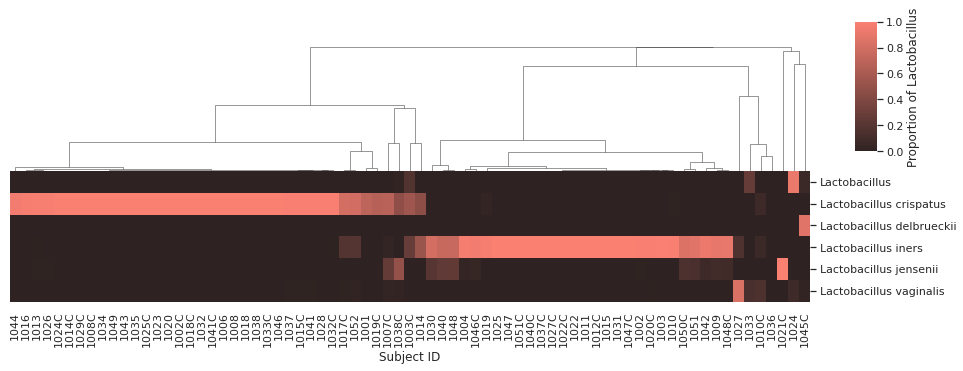

In [3]:
%matplotlib inline
lacto_features = tax_df[tax_df["Taxon"].str.contains("Lactobacillus")].index
lacto_df = table_df[lacto_features]
lacto_df = lacto_df[lacto_df.index.str.contains("-V")]
lacto_df = lacto_df.T
lacto_df = lacto_df / lacto_df.sum()
lacto_df["TaxClass"] = tax_df["Taxon"][lacto_df.index].str.split("; ").str[-1].str.replace(".__","", regex=True).str.replace("_"," ")
lacto_df.columns = lacto_df.columns.str.split("-").str[0]
lacto_df = lacto_df[lacto_df["TaxClass"].isin(["Lactobacillus crispatus","Lactobacillus jensenii","Lactobacillus iners","Lactobacillus delbrueckii","Lactobacillus","Lactobacillus vaginalis"])]
lacto_df = lacto_df.groupby('TaxClass', as_index=True).agg('sum')

# Print the prevalence summed across subjects
print(lacto_df.T.sum().sort_values(ascending=False))

cm=sns.clustermap(lacto_df,xticklabels=True,method="complete",
                  row_cluster=False,
                  dendrogram_ratio=(0, .5),
                  cbar_pos=(0.8, 0.6, 0.02, 0.45),
                  cbar_kws={'label': 'Proportion of Lactobacillus'},
                  cmap=sns.dark_palette("salmon", as_cmap=True))
cm.fig.set_size_inches(15,4)
cm.ax_heatmap.set(ylabel=None)
cm.ax_heatmap.set(xlabel="Subject ID")
plt.setp(cm.ax_heatmap.get_yticklabels(), rotation=0) 
cm.savefig("LactoHeatmapDendrogram.pdf")

Creating a heatmap of the top N taxonomic classifications, showing dominance of all taxa within each vaginal sample

Index(['Bacteria; Firmicutes; Bacilli; Lactobacillales; Lactobacillaceae; Lactobacillus; Lactobacillus crispatus',
       'Bacteria; Firmicutes; Bacilli; Lactobacillales; Lactobacillaceae; Lactobacillus; Lactobacillus iners',
       'Bacteria; Actinobacteriota; Actinobacteria; Bifidobacteriales; Bifidobacteriaceae; Gardnerella',
       'Bacteria; Actinobacteriota; Actinobacteria; Bifidobacteriales; Bifidobacteriaceae; Gardnerella; Gardnerella vaginalis',
       'Bacteria; Bacteroidota; Bacteroidia; Bacteroidales; Prevotellaceae; Prevotella; Prevotella bivia',
       'Bacteria; Firmicutes; Bacilli; Lactobacillales; Lactobacillaceae; Lactobacillus; Lactobacillus jensenii',
       'Bacteria; Firmicutes; Bacilli; Lactobacillales; Streptococcaceae; Streptococcus',
       'Bacteria; Bacteroidota; Bacteroidia; Bacteroidales; Prevotellaceae; Prevotella; Prevotella timonensis',
       'Bacteria; Fusobacteriota; Fusobacteriia; Fusobacteriales; Leptotrichiaceae; Sneathia; Sneathia sanguinegens',


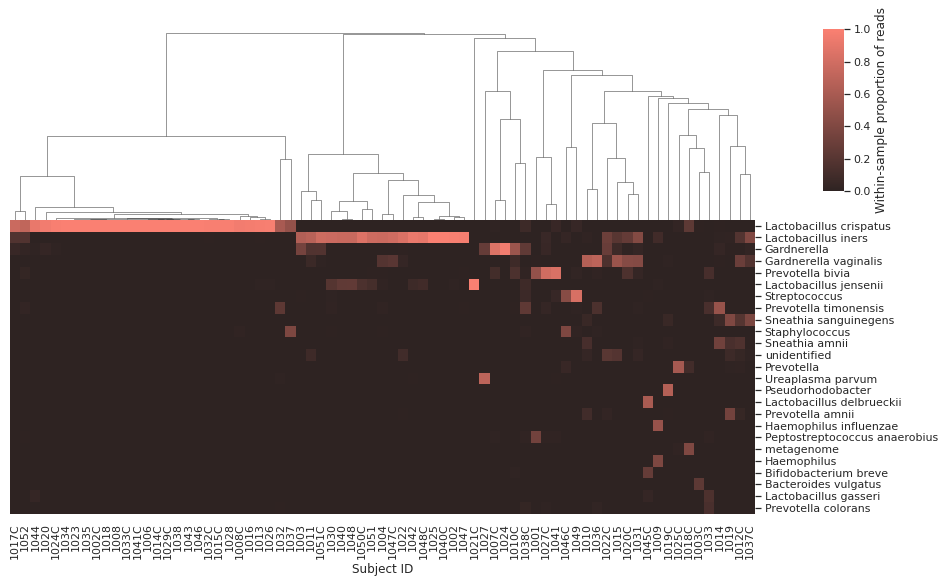

In [4]:
full_df = table_df[table_df.index.str.contains("-V")].T
full_df = full_df / full_df.sum()
full_df["TaxClass"] = tax_df["Taxon"][full_df.index].str.replace(".__","", regex=True).str.replace("_"," ")
full_df = full_df.groupby('TaxClass', as_index=True).agg('sum')
topN = 25
top = full_df.sum(axis=1).sort_values(ascending=False)[0:topN]
top_df = full_df.loc[top.index]
top_df.columns = top_df.columns.str.split("-").str[0]
#Print these so we have a record of the full classification before we trim to the last element
print(top_df.index)
top_df.index = top_df.index.str.split("; ").str[-1]
cm=sns.clustermap(top_df,yticklabels=True,xticklabels=True,method="complete",
                  row_cluster=False,
                  dendrogram_ratio=(0, .4),
                  cbar_pos=(0.77, 0.675, 0.02, 0.3),
                  cbar_kws={'label': 'Within-sample proportion of reads'},
                  cmap=sns.dark_palette("salmon", as_cmap=True))
cm.fig.set_size_inches(15,7.5)
cm.ax_heatmap.set(ylabel=None)
cm.ax_heatmap.set(xlabel="Subject ID")
plt.setp(cm.ax_heatmap.get_yticklabels(), rotation=0)

cm.savefig("TopHeatmapDendrogram.pdf")

In [5]:
#For posterity and recordkeeping, here are the installed libraries used for this analysis
import pkg_resources
installed_packages = pkg_resources.working_set
installed_packages_list = sorted(["%s==%s" % (i.key, i.version)
   for i in installed_packages])
print("\n".join(installed_packages_list))

argon2-cffi==20.1.0
async-generator==1.10
attrs==20.3.0
backcall==0.2.0
backports.functools-lru-cache==1.6.4
bibtexparser==1.1.0
biom-format==2.1.10
bleach==3.3.0
bokeh==2.3.1
brotlipy==0.7.0
cachecontrol==0.12.6
cached-property==1.5.2
certifi==2020.12.5
cffi==1.14.5
chardet==4.0.0
click==7.1.2
cryptography==3.4.7
cutadapt==3.4
cycler==0.10.0
cython==0.29.23
deblur==1.1.0
decorator==4.4.2
defusedxml==0.7.1
dendropy==4.5.2
dnaio==0.5.0
emperor==1.0.3
entrypoints==0.3
fastcluster==1.1.26
future==0.18.2
gneiss==0.4.6
h5py==3.2.1
hdmedians==0.14.2
idna==2.10
ijson==3.1.3
importlib-metadata==3.10.1
iniconfig==1.1.1
ipykernel==5.5.3
ipython-genutils==0.2.0
ipython==7.22.0
ipywidgets==7.6.3
isal==0.10.0
jedi==0.18.0
jinja2==2.11.3
joblib==1.0.1
jsonschema==3.2.0
jupyter-client==6.1.12
jupyter-core==4.7.1
jupyterlab-pygments==0.1.2
jupyterlab-widgets==1.0.0
kiwisolver==1.3.1
lockfile==0.12.2
lxml==4.6.3
lz4==3.1.3
markupsafe==1.1.1
matplotlib==3.4.1
mistune==0.8.4
more-itertools==8.7.0
msgpack